<a href="https://colab.research.google.com/github/eekals/da_blog/blob/main/%EC%BA%A1%EC%8A%A4%ED%86%A4%EB%94%94%EC%9E%90%EC%9D%B8_14p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install koreanize-matplotlib

In [ ]:
import pandas as pd
import numpy as np
import random
import koreanize_matplotlib
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
data = pd.read_csv('two_dice.csv')
dice1 = data['dice1']
dice2 = data['dice2']

## 과제1.1

✅ 전략1 `random_place_strategy` : dice1의 자리를 랜덤하게 선정          
✅ 전략2 `always_tens_strategy` : dice1의 자리를 10의 자리로 고정        
✅ 전략3 `always_ones_strategy` : dice1의 자리를 1의 자리로 고정          


In [ ]:
# 전략1 : 첫번째 주사위의 자리를 랜덤하게 선정
def random_place_strategy(dice1, dice2):
    place_tens = random.choice([True, False])  # True: 10의 자리, False: 1의 자리
    if place_tens:
        return dice1 * 10 + dice2
    else:
        return dice2 * 10 + dice1

# 전략2 : 첫번째 주사위의 자리를 무조건 10의 자리
def always_tens_strategy(dice1, dice2):
    return dice1 * 10 + dice2

# 전략3 : 첫번째 주사위의 자리를 무조건 1의 자리
def always_ones_strategy(dice1, dice2):
    return dice2 * 10 + dice1

In [ ]:
# 전략들을 실행하고 총점수와 평균 점수를 구하는 함수
def calculate_total_and_average(strategy, data):
    results = []
    for i in range(len(data)):
        dice1 = data['dice1'][i]
        dice2 = data['dice2'][i]
        result = strategy(dice1, dice2)
        results.append(result)

    total_score = sum(results)
    average_score = total_score / len(results)
    return total_score, average_score, results

In [ ]:
# 전략별 총점수와 평균 점수 계산
total_score_1, average_score_1, results_1 = calculate_total_and_average(random_place_strategy, data)
total_score_2, average_score_2, results_2 = calculate_total_and_average(always_tens_strategy, data)
total_score_3, average_score_3, results_3 = calculate_total_and_average(always_ones_strategy, data)

print(f"전략 1 (랜덤 선택) - 총점수: {total_score_1}, 평균 점수: {average_score_1}")
print(f"전략 2 (10의 자리 고정) - 총점수: {total_score_2}, 평균 점수: {average_score_2}")
print(f"전략 3 (1의 자리 고정) - 총점수: {total_score_3}, 평균 점수: {average_score_3}")

# 최선의 전략을 결정 (평균 점수가 가장 높은 전략을 선택)
best_strategy = max([(average_score_1, "랜덤 선택"),
                     (average_score_2, "10의 자리 고정"),
                     (average_score_3, "1의 자리 고정")])

전략 1 (랜덤 선택) - 총점수: 38487279, 평균 점수: 38.487279
전략 2 (10의 자리 고정) - 총점수: 38503767, 평균 점수: 38.503767
전략 3 (1의 자리 고정) - 총점수: 38479557, 평균 점수: 38.479557
최선의 전략: 10의 자리 고정


- 큰 차이가 없다.

✅ 전략1  : 첫번째 주사위가 3이상이면 (= [3,4,5,6] 이면) 10의 자리 아니면 1의 자리          
✅ 전략2  : 첫번째 주사위가 4이상이면 (= [4,5,6] 이면) 이면 10의 자리 아니면 1의 자리        
✅ 전략3  : 첫번째 주사위가 5이상이면 (= [5,6] 이면) 10의 자리 아니면 1의 자리

In [ ]:
import numpy as np

# 가능한 주사위 값
dice_values = [1, 2, 3, 4, 5, 6]

# 전략 함수
def strategy(dice1, dice2, threshold):
    if dice1 >= threshold:
        return dice1 * 10 + dice2
    else:
        return dice2 * 10 + dice1

# 각 전략별 threshold 설정
thresholds = [3, 4, 5]  # 전략1(3 이상), 전략2(4 이상), 전략3(5 이상)

# 가능한 주사위 조합 계산
dice_combinations = [(d1, d2) for d1 in dice_values for d2 in dice_values]

# 전략별 총점수, 평균, 기댓값 계산
for t in thresholds:
    results = [strategy(d1, d2, t) for d1, d2 in dice_combinations]

    # 총점수
    total_score = sum(results)

    # 평균
    mean_score = np.mean(results)


    print(f"Threshold {t}: 총점수 = {total_score}, 평균 = {mean_score}")



Threshold 3: 총점수 = 1602, 평균 = 44.5
Threshold 4: 총점수 = 1629, 평균 = 45.25
Threshold 5: 총점수 = 1602, 평균 = 44.5


🎲
첫 주사위가 4이상인 경우 10의 자리에 배치 아니면 1의 자리를 배치하는 전략에서 가장 높은 점수가 나왔다.

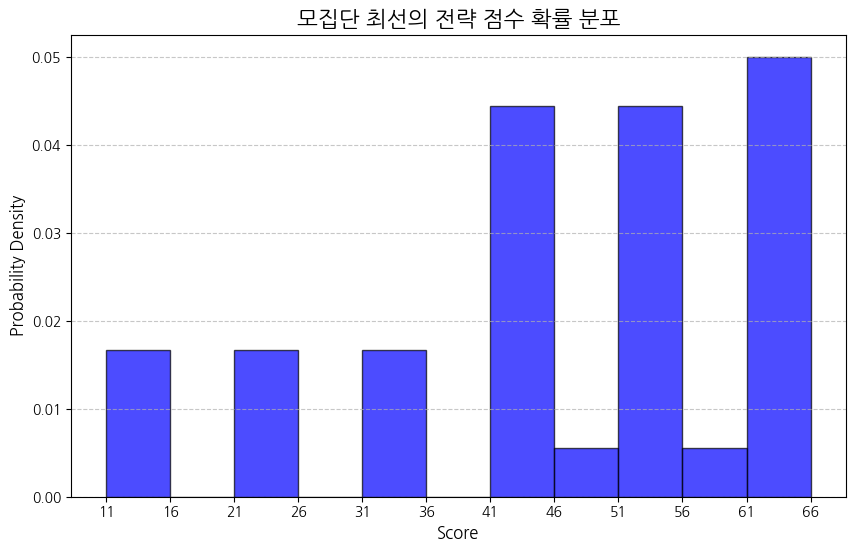

표본에서 총점수 = 45241257
표본에서 평균 = 45.241257
모집단에서 기댓값 = 45.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 가능한 주사위 값
dice_values = [1, 2, 3, 4, 5, 6]

# 최선의 전략 함수
def best_strategy(dice1, dice2):
    return dice1 * 10 + dice2 if dice1 >= 4 else dice2 * 10 + dice1

# 표본에서 최선의 전략 점수 계산
sample_best_scores = [best_strategy(d1, d2) for d1, d2 in zip(dice1, dice2)]

# 표본에서의 총점수
sample_total_score = sum(sample_best_scores)

# 표본에서의 평균 (표본 평균)
sample_mean_score = np.mean(sample_best_scores)

# 모집단에서 가능한 모든 최선의 전략 점수 계산
dice_combinations = [(d1, d2) for d1 in dice_values for d2 in dice_values]
population_best_scores = [best_strategy(d1, d2) for d1, d2 in dice_combinations]

# 모집단에서의 기댓값 (모든 가능한 조합에 대한 평균)
population_expected_value = np.mean(population_best_scores)

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(population_best_scores, bins=range(min(population_best_scores), max(population_best_scores) + 5, 5),
         color="blue", alpha=0.7, edgecolor="black", density=True)

# 그래프 제목 및 레이블 설정
plt.xlabel("Score", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("모집단 최선의 전략 점수 확률 분포", fontsize=16)
plt.xticks(range(min(population_best_scores), max(population_best_scores) + 5, 5))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 출력
plt.show()

# 출력 결과
print(f"표본에서 총점수 = {sample_total_score}")
print(f"표본에서 평균 = {sample_mean_score}")
print(f"모집단에서 기댓값 = {population_expected_value}")


### 결론
- 최선의 전략에서 `총점수 = 45241257`, `평균 = 45.241257`
- 최선의 전략에서 기대 점수는 `45.25` 이다.

## 과제1.2

In [ ]:
data = pd.read_csv('three_dice.csv')
dice1 = data['dice1']
dice2 = data['dice2']
dice3 = data['dice3']

✅ 전략1:        
1️⃣ 첫 번째 주사위 (dice1) 값이 임계값 이상이면 100의 자리          
2️⃣ 아니면 1의 자리           
3️⃣ 두 번째 주사위 (dice2) 값이 임계값 이상이면 10의 자리            
4️⃣ 아니면 1의 자리           
5️⃣ 남은 한 자리에는 세 번째 주사위 (dice3) 배치            

✅ 전략2:        
1️⃣ 첫 번째 주사위 (dice1) 값이 임계값 이상이면 100의 자리         
2️⃣ 아니면 10의 자리         
3️⃣ 두 번째 주사위 (dice2) 값이 임계값 이상이면 10의 자리           
4️⃣ 아니면 1의 자리             
5️⃣ 남은 한 자리에는 세 번째 주사위 (dice3) 배치     

x1 >= 2 / x1 <= 1 / x2 >= 1: 평균 = 432.2898, 표준오차 = 1.4878887732609585, 총점=4322898
x1 >= 2 / x1 <= 1 / x2 >= 2: 평균 = 440.883, 표준오차 = 1.4414378554415728, 총점=4408830
x1 >= 2 / x1 <= 1 / x2 >= 3: 평균 = 446.7735, 표준오차 = 1.4309509284999955, 총점=4467735
x1 >= 2 / x1 <= 1 / x2 >= 4: 평균 = 448.866, 표준오차 = 1.4522637378933623, 총점=4488660
x1 >= 2 / x1 <= 1 / x2 >= 5: 평균 = 447.0993, 표준오차 = 1.4814949422630506, 총점=4470993
x1 >= 2 / x1 <= 1 / x2 >= 6: 평균 = 441.2673, 표준오차 = 1.5047416007643968, 총점=4412673
x1 >= 3 / x1 <= 1 / x2 >= 1: 평균 = 453.9798, 표준오차 = 1.4423638373156755, 총점=4539798
x1 >= 3 / x1 <= 1 / x2 >= 2: 평균 = 468.441, 표준오차 = 1.3131810278480265, 총점=4684410
x1 >= 3 / x1 <= 1 / x2 >= 3: 평균 = 478.3185, 표준오차 = 1.2689484015416073, 총점=4783185
x1 >= 3 / x1 <= 1 / x2 >= 4: 평균 = 482.229, 표준오차 = 1.3017953433239802, 총점=4822290
x1 >= 3 / x1 <= 1 / x2 >= 5: 평균 = 479.3553, 표준오차 = 1.3703754617589297, 총점=4793553
x1 >= 3 / x1 <= 1 / x2 >= 6: 평균 = 469.6353, 표준오차 = 1.4384558350505585, 총점=4696353
x1 >= 3 / x1 <= 2 / 

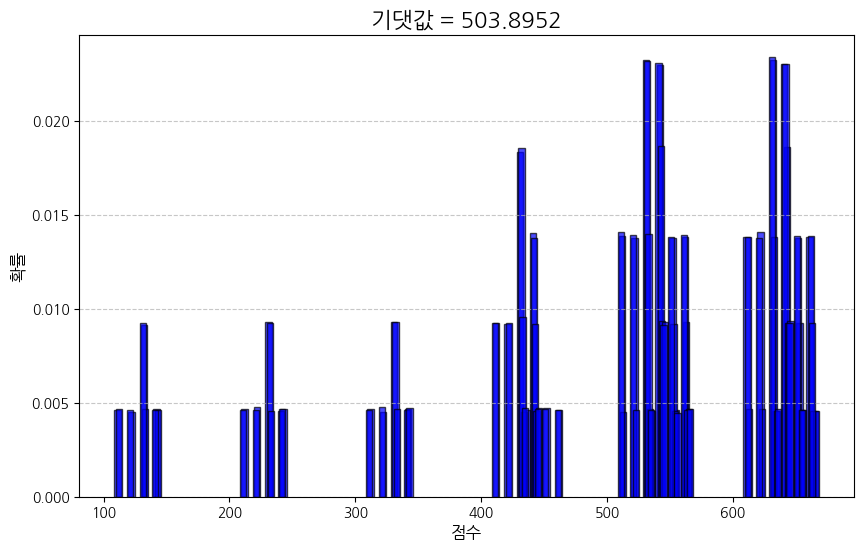

이론적 기댓값: 503.99999999999994


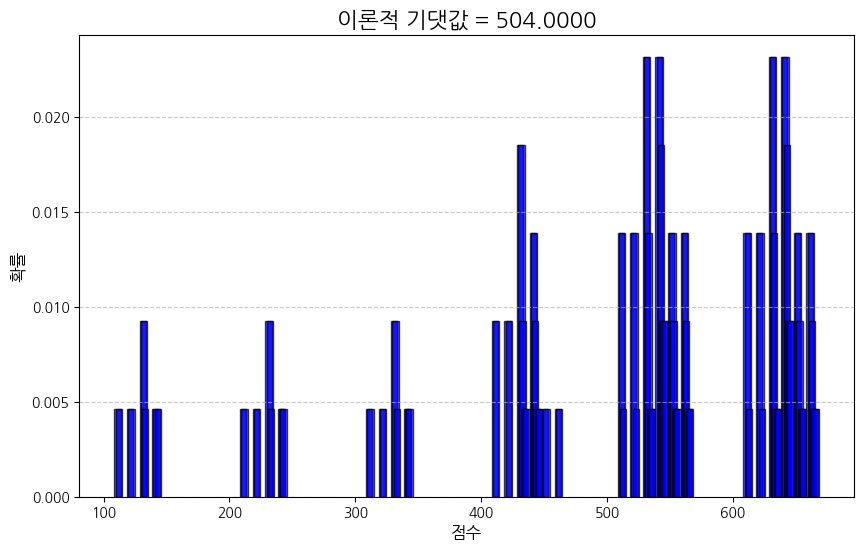

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 데이터 불러오기
data = pd.read_csv('three_dice.csv')
dice_df = data[['dice1', 'dice2', 'dice3']]

# 세 자리 수를 만드는 함수: 주사위 3개 결과와 기준(bound)을 인자로 받음
def dice_three_digit_rule(bound_high, bound_low, bound2, dice):
    if dice[0] >= bound_high:
        if dice[1] >= bound2:
            return dice[0] * 100 + dice[1] * 10 + dice[2]
        else:
            return dice[0] * 100 + dice[2] * 10 + dice[1]
    elif dice[0] <= bound_low:
        if dice[1] >= bound2:
            return dice[1] * 100 + dice[2] * 10 + dice[0]
        else:
            return dice[2] * 100 + dice[1] * 10 + dice[0]
    else:
        if dice[1] >= bound2:
            return dice[1] * 100 + dice[0] * 10 + dice[2]
        else:
            return dice[2] * 100 + dice[0] * 10 + dice[1]

# 시뮬레이션 횟수
rep = 10000

# 여러 파라미터(전략) 조합에 대해 총점수 계산
results = []
for b1_high in range(2, 7):
    for b1_low in range(1, b1_high):
        for b2 in range(1, 7):
            temp_results = []
            for i in range(rep):
                dice = dice_df.iloc[i].values
                result = dice_three_digit_rule(b1_high, b1_low, b2, dice)
                temp_results.append(result)
            mean_result = np.mean(temp_results)
            std_error = np.std(temp_results) / np.sqrt(rep)
            total_score = np.sum(temp_results)
            results.append((b1_high, b1_low, b2, mean_result, std_error, total_score))
            print(f"x1 >= {b1_high} / x1 <= {b1_low} / x2 >= {b2}: 평균 = {mean_result}, 표준오차 = {std_error}, 총점={total_score}")

# 특정 전략 (예: bound_high=5, bound_low=2, bound2=4) 에 대해 결과 확인
b1_high = 5
b1_low = 2
bound2 = 4

N = len(dice_df)
result = []
for i in range(N):
    dice = dice_df.iloc[i].values
    result.append(dice_three_digit_rule(b1_high, b1_low, bound2, dice))

total_score = np.sum(result)
mean_score = np.mean(result)

# 결과 출력
print(f"총점수: {total_score}")
print(f"평균: {mean_score}")

# 확률분포 시각화
score_counts = Counter(result)
score_vals = list(score_counts.keys())
prob = [score_counts[score] / N for score in score_vals]

plt.figure(figsize=(10, 6))
plt.bar(score_vals, prob, width=5, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("점수", fontsize=12)
plt.ylabel("확률", fontsize=12)
plt.title(f"기댓값 = {mean_score:.4f}", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 이론적 기댓값 계산 (모든 216가지 경우)
scores = []
for dice1 in range(1, 7):
    for dice2 in range(1, 7):
        for dice3 in range(1, 7):
            score = dice_three_digit_rule(b1_high, b1_low, bound2, [dice1, dice2, dice3])
            scores.append(score)

# 각 점수의 확률 계산
score_counts = Counter(scores)
score_vals = list(score_counts.keys())
prob = [score_counts[score] / len(scores) for score in score_vals]

# 이론적 기댓값 계산
expected_value = np.sum(np.array(score_vals) * np.array(prob))
print(f"이론적 기댓값: {expected_value}")

# 이론적 확률분포 시각화
plt.figure(figsize=(10, 6))
plt.bar(score_vals, prob, width=5, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("점수", fontsize=12)
plt.ylabel("확률", fontsize=12)
plt.title(f"이론적 기댓값 = {expected_value:.4f}", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


최선의 전략은 x1 >= 5 / x1 <= 3 / x2 >= 4: 평균 = 504.0774, 표준오차 = 1.458845338246656, 총점=5040774 인경우

### 결과

### 4. 이 게임에서 얻을 수 있는 일상생활이나 삶의 교훈이 무엇이라고 생각하는지 자신의 경험에 기반하여 300자 이상 기술하라.

**최적의 전략을 찾기 위해 다양한 실험을 해야 한다는 교훈을 얻었다.** 한두 번의 시도로 결론을 내리기보다는, 여러 가지 전략을 시도해 보고 가장 좋은 결과를 도출하는 과정에서 더 설득력 있는 결론을 얻을 수 있었고, 많은 것을 배울 수 있었다. 그리고 좋은 결과에 더 효율적으로 접근하기 위해서는 AI나 새로운 도구를 활용하는 방법을 익히는 것이 필요하다고 생각했다. 요즘은 원하는 정보를 빠르게 찾아볼 수 있는 기술과 도구가 많기 때문에, 이를 잘 활용하면 시간과 노력을 아끼면서도 다양한 실험을 통해 더 많은 경험을 빠르게 습득할 수 있다. 무작정 혼자 고민하는 것보다, 효과적인 방법을 찾아 유연하게 접근하는 것이 중요하다는 점을 다시 한번 깨달았다.